The goal of this project is to analyze weather data and forecast future temperatures using unsupervised learning and time series models. Initially, exploratory data analysis (EDA) will be performed to understand the dataset. Then, clustering techniques such as K-Means, Gaussian Mixture Models (GMM), and DBSCAN will be applied to identify patterns in the data. After that, ARIMA and SARIMAX models will be used for time series forecasting to predict future temperatures (both maximum and minimum).
The models will be evaluated using Mean Absolute Error (MAE) and accuracy to determine the best forecasting method. The project will conclude with a comparison of the clustering results and forecasting model performances.


# Data Loading and basic evaluation



The data is of the shape (679, 13).

All variables apart from date (which is in object format) are in number format (int/float). We will need to change the date to datetime format.

Based on data overview and summary, we can see that there are no null values and the data is for 679 unique dates.


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr, spearmanr
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')


In [62]:
!gdown "10EKllD9JD8mITh5llT9hLm5HhZGV0LZV"
df=pd.read_csv('/content/Jaipur Data.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=10EKllD9JD8mITh5llT9hLm5HhZGV0LZV
To: /content/Jaipur Data.csv
100% 38.5k/38.5k [00:00<00:00, 63.8MB/s]


date  meantempm  meandewptm  meanpressurem  maxhumidity  minhumidity  \
0  2016-05-01         34          -1        1005.63           24            4   
1  2016-05-02         36           4        1005.46           21            6   
2  2016-05-03         35           6        1006.00           27            5   
3  2016-05-04         34           7        1005.65           29            6   
4  2016-05-05         31          11        1007.94           61           13   

   maxtempm  mintempm  maxdewptm  mindewptm  maxpressurem  minpressurem  \
0        43        26          9        -10          1009           999   
1        43        29         10         -2          1008          1001   
2        41        29         12         -2          1009          1000   
3        41        27         13          0          1008          1001   
4        38        24         16          6          1011          1003   

   precipm  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      5.0

In [63]:
df.info()     #date is in the wrong format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           679 non-null    object 
 1   meantempm      679 non-null    int64  
 2   meandewptm     679 non-null    int64  
 3   meanpressurem  679 non-null    float64
 4   maxhumidity    679 non-null    int64  
 5   minhumidity    679 non-null    int64  
 6   maxtempm       679 non-null    int64  
 7   mintempm       679 non-null    int64  
 8   maxdewptm      679 non-null    int64  
 9   mindewptm      679 non-null    int64  
 10  maxpressurem   679 non-null    int64  
 11  minpressurem   679 non-null    int64  
 12  precipm        679 non-null    float64
dtypes: float64(2), int64(10), object(1)
memory usage: 69.1+ KB


In [64]:
df.columns

Index(['date', 'meantempm', 'meandewptm', 'meanpressurem', 'maxhumidity',
       'minhumidity', 'maxtempm', 'mintempm', 'maxdewptm', 'mindewptm',
       'maxpressurem', 'minpressurem', 'precipm'],
      dtype='object')

In [65]:
df.describe().T     #data not normal

count         mean        std     min       25%      50%  \
meantempm      679.0    26.092784   6.223843   10.00    20.000    28.00   
meandewptm     679.0    11.951399   8.738194  -10.00     5.000    10.00   
meanpressurem  679.0  1009.493417   6.472317  997.63  1003.715  1008.81   
maxhumidity    679.0    67.265096  22.159195   15.00    50.000    66.00   
minhumidity    679.0    22.742268  19.363085    4.00     9.000    15.00   
maxtempm       679.0    32.567010   6.010402   18.00    28.000    33.00   
mintempm       679.0    19.667158   6.833975    3.00    13.000    22.00   
maxdewptm      679.0    16.147275   7.235735    0.00    10.000    15.00   
mindewptm      679.0     7.438881  11.694565  -94.00     0.000     6.00   
maxpressurem   679.0  1012.240059   6.520884  999.00  1006.000  1012.00   
minpressurem   679.0  1005.268041   7.124392  992.00   999.000  1004.00   
precipm        679.0     1.245066   5.424255    0.00     0.000     0.00   

                   75%      max  
meantempm        30.00    38.00  
meandewptm       21.00    26.00  
meanpressurem  1015.51  1023.43  
maxhumidity      88.00   100.00  
minhumidity      33.00    89.00  
maxtempm         37.00    46.00  
mintempm         25.00    32.00  
maxdewptm        23.00    29.00  
mindewptm        18.00    25.00  
maxpressurem   1018.00  1026.00  
minpressurem   1012.00  1020.00  
precipm           0.00    57.00

In [66]:
df.describe(include="object")


date
count          679
unique         679
top     2018-03-11
freq             1

In [67]:
df.describe(include="all")


date   meantempm  meandewptm  meanpressurem  maxhumidity  \
count          679  679.000000  679.000000     679.000000   679.000000   
unique         679         NaN         NaN            NaN          NaN   
top     2018-03-11         NaN         NaN            NaN          NaN   
freq             1         NaN         NaN            NaN          NaN   
mean           NaN   26.092784   11.951399    1009.493417    67.265096   
std            NaN    6.223843    8.738194       6.472317    22.159195   
min            NaN   10.000000  -10.000000     997.630000    15.000000   
25%            NaN   20.000000    5.000000    1003.715000    50.000000   
50%            NaN   28.000000   10.000000    1008.810000    66.000000   
75%            NaN   30.000000   21.000000    1015.510000    88.000000   
max            NaN   38.000000   26.000000    1023.430000   100.000000   

        minhumidity    maxtempm    mintempm   maxdewptm   mindewptm  \
count    679.000000  679.000000  679.000000  679.000000  679.000000   
unique          NaN         NaN         NaN         NaN         NaN   
top             NaN         NaN         NaN         NaN         NaN   
freq            NaN         NaN         NaN         NaN         NaN   
mean      22.742268   32.567010   19.667158   16.147275    7.438881   
std       19.363085    6.010402    6.833975    7.235735   11.694565   
min        4.000000   18.000000    3.000000    0.000000  -94.000000   
25%        9.000000   28.000000   13.000000   10.000000    0.000000   
50%       15.000000   33.000000   22.000000   15.000000    6.000000   
75%       33.000000   37.000000   25.000000   23.000000   18.000000   
max       89.000000   46.000000   32.000000   29.000000   25.000000   

        maxpressurem  minpressurem     precipm  
count     679.000000    679.000000  679.000000  
unique           NaN           NaN         NaN  
top              NaN           NaN         NaN  
freq             NaN           NaN         NaN  
mean     1012.240059   1005.268041    1.245066  
std         6.520884      7.124392    5.424255  
min       999.000000    992.000000    0.000000  
25%      1006.000000    999.000000    0.000000  
50%      1012.000000   1004.000000    0.000000  
75%      1018.000000   1012.000000    0.000000  
max      1026.000000   1020.000000   57.000000

In [68]:
df.shape

(679, 13)

# Data Cleaning
There are no missing values, or duplicates in the data.

The date was converted from object to datetime format. We sorted the dataframe with respect to this date and made it the index.


In [69]:
df['date'] = pd.to_datetime(df['date'])     #converting date to proper format and then sorting the data on that basis and setting it as index
df = df.sort_values('date')
print(df.info())
df.set_index('date', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           679 non-null    datetime64[ns]
 1   meantempm      679 non-null    int64         
 2   meandewptm     679 non-null    int64         
 3   meanpressurem  679 non-null    float64       
 4   maxhumidity    679 non-null    int64         
 5   minhumidity    679 non-null    int64         
 6   maxtempm       679 non-null    int64         
 7   mintempm       679 non-null    int64         
 8   maxdewptm      679 non-null    int64         
 9   mindewptm      679 non-null    int64         
 10  maxpressurem   679 non-null    int64         
 11  minpressurem   679 non-null    int64         
 12  precipm        679 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(10)
memory usage: 69.1 KB
None


In [70]:
date_duration=df.index.max() - df.index.min()

In [71]:
df.isnull().sum()     #No nulls

meantempm        0
meandewptm       0
meanpressurem    0
maxhumidity      0
minhumidity      0
maxtempm         0
mintempm         0
maxdewptm        0
mindewptm        0
maxpressurem     0
minpressurem     0
precipm          0
dtype: int64

In [72]:
df[df.duplicated()]   #No duplicates either

Empty DataFrame
Columns: [meantempm, meandewptm, meanpressurem, maxhumidity, minhumidity, maxtempm, mintempm, maxdewptm, mindewptm, maxpressurem, minpressurem, precipm]
Index: []

# EDA

**Univariate**:
min humidity and min temperature has outliers, and Precipitation has a lot of outliers.

**Bivariate**:
Pressure and temperature correlation is strongly negative (–0.70 to –0.87)

Min temperature and dew point correlation is highly positive (0.63–0.84).

max temperature and humidity correlation is moderately negative (–0.12 to –0.42).

Pressure and humidity correlation is moderately negative (–0.47 to –0.69).

Precipitation and humidity correlation is weak-to-moderate positive (0.29–0.42).

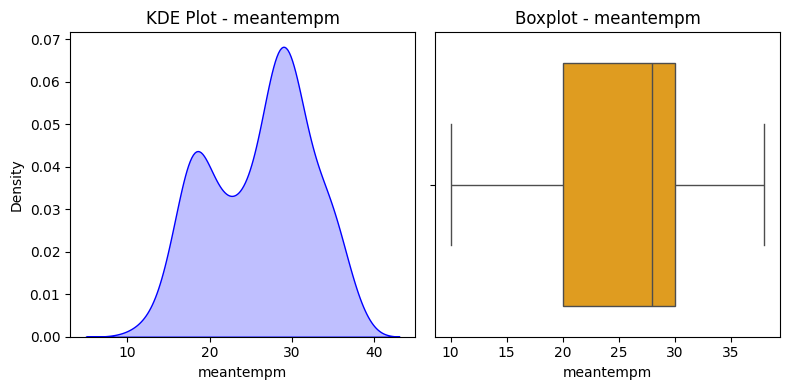

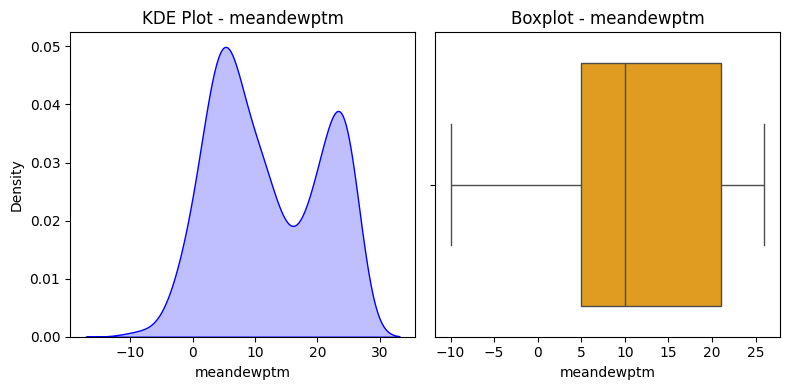

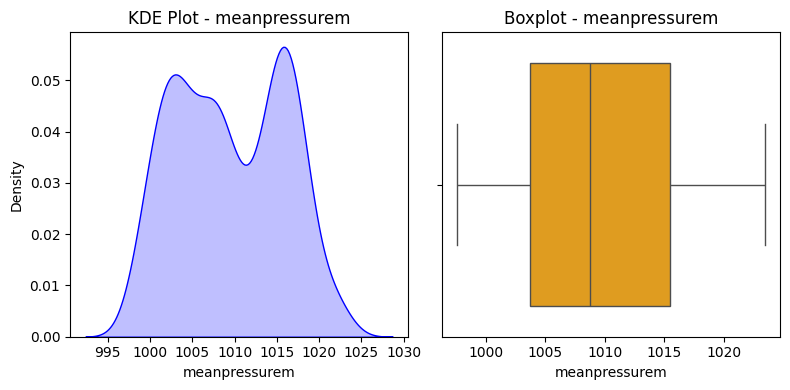

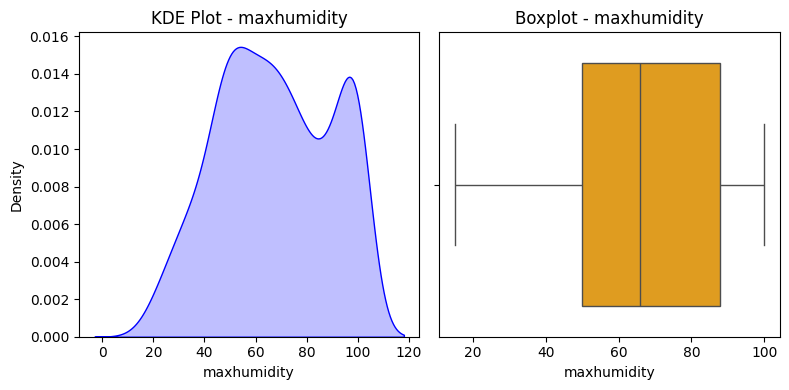

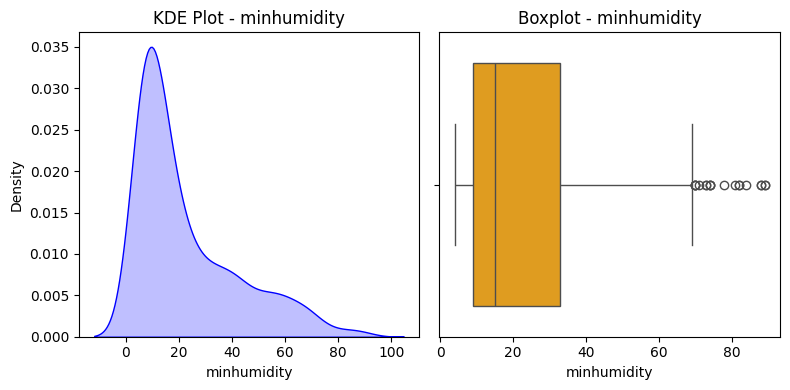

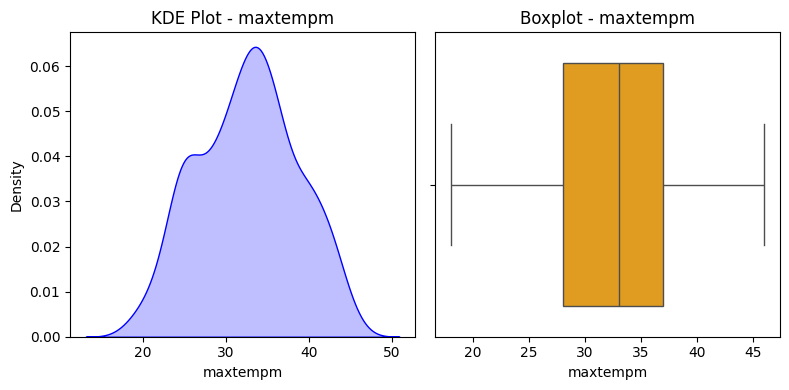

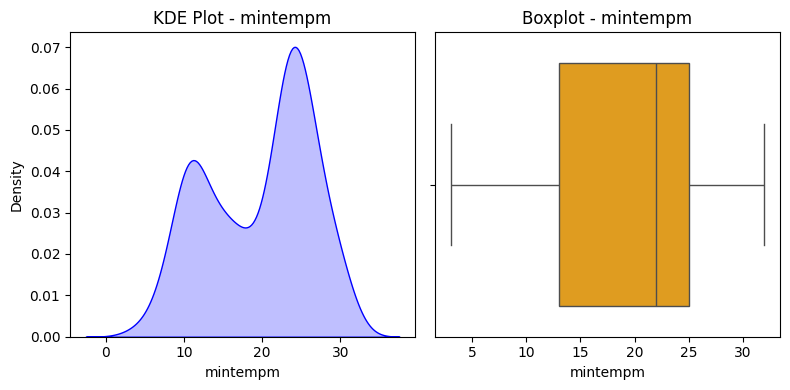

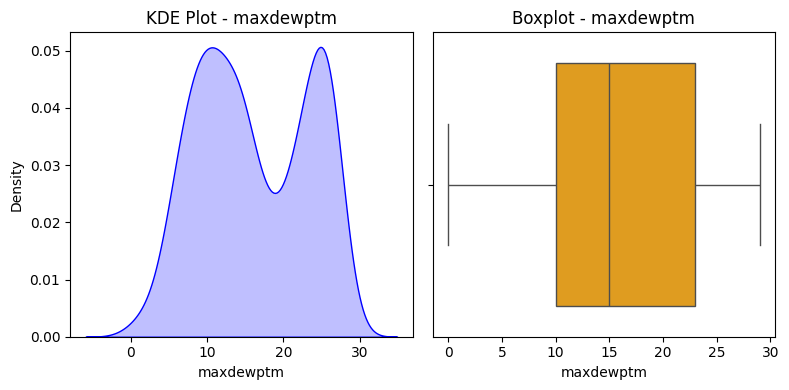

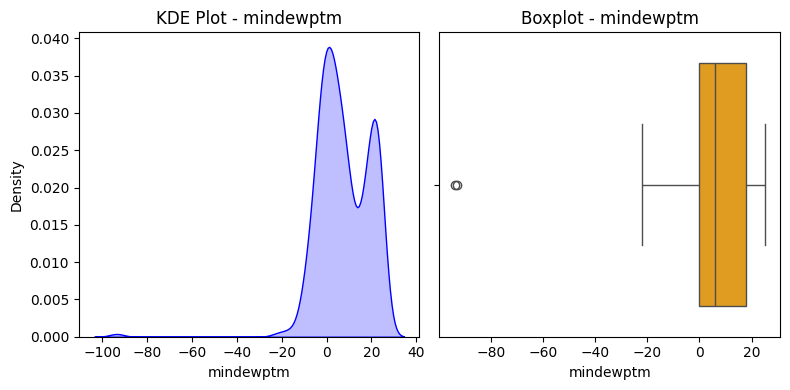

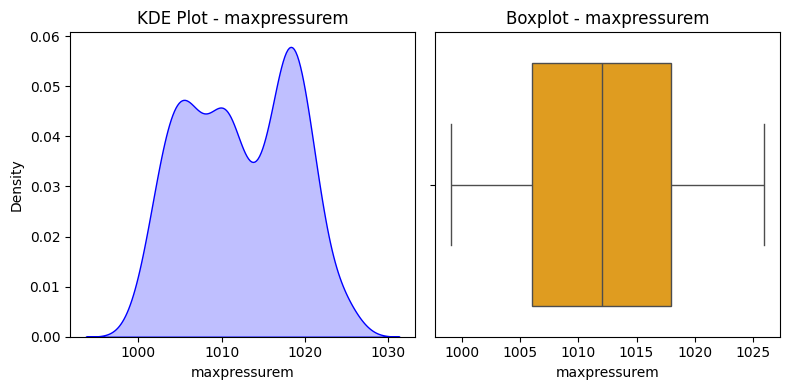

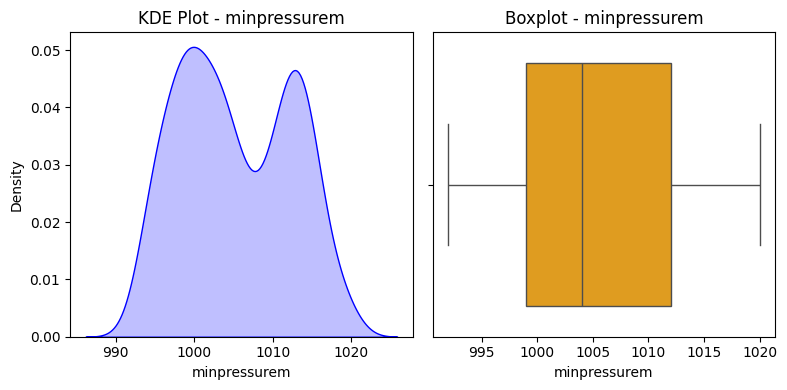

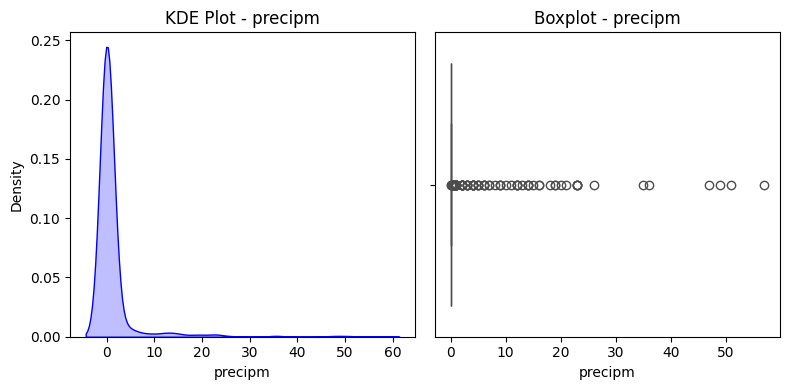

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # KDE Plot
    sns.kdeplot(df[col].dropna(), ax=axes[0], shade=True, color="blue")
    axes[0].set_title(f"KDE Plot - {col}")

    # Boxplot
    sns.boxplot(x=df[col].dropna(), ax=axes[1], color="orange")
    axes[1].set_title(f"Boxplot - {col}")

    plt.tight_layout()
    plt.show()


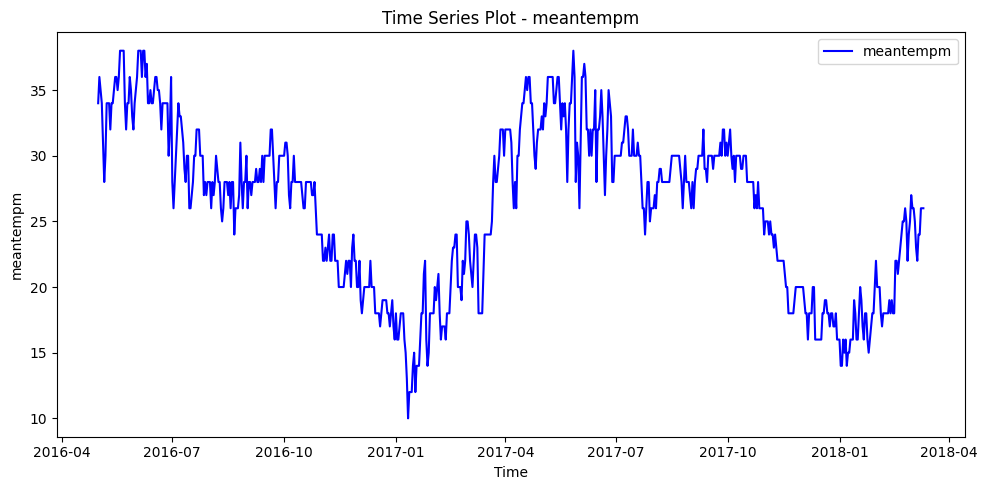

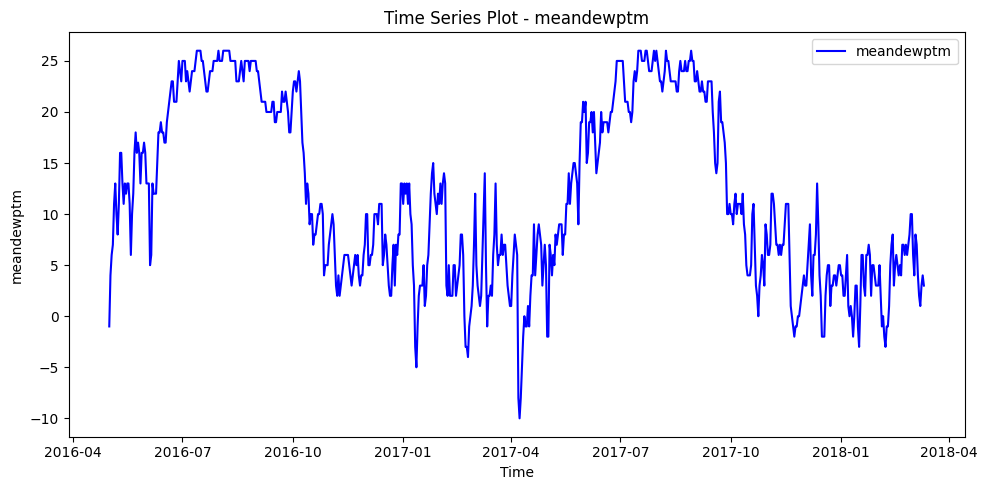

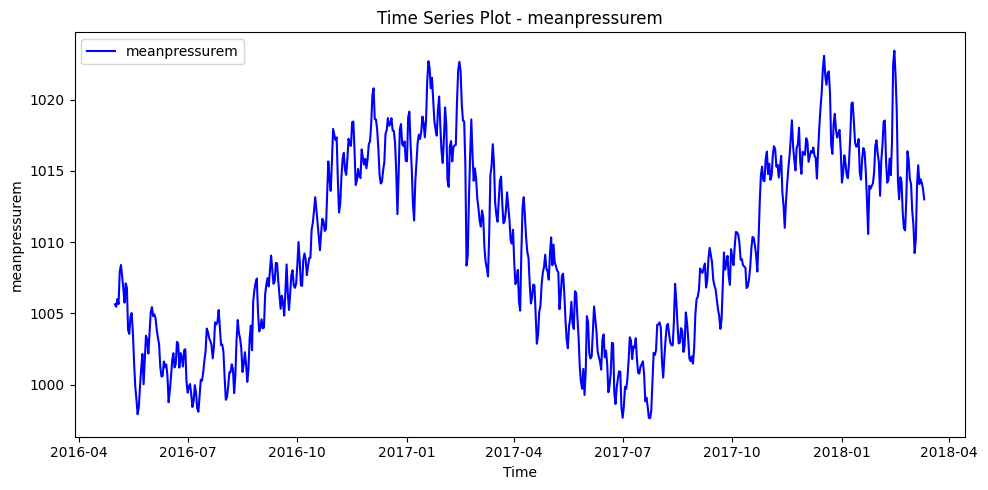

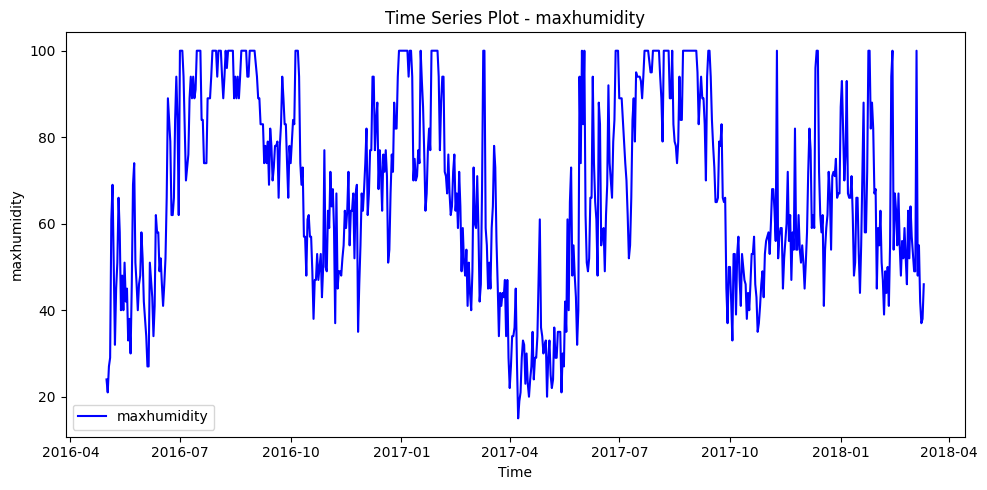

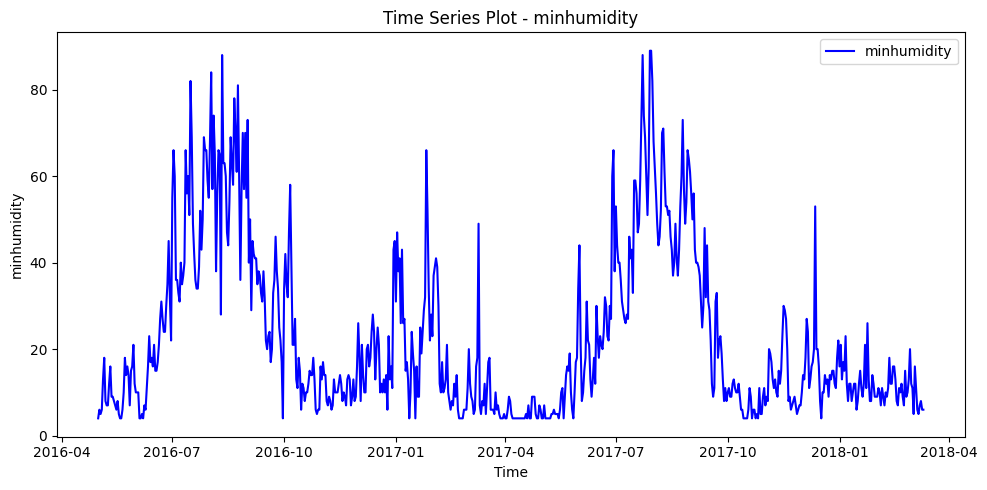

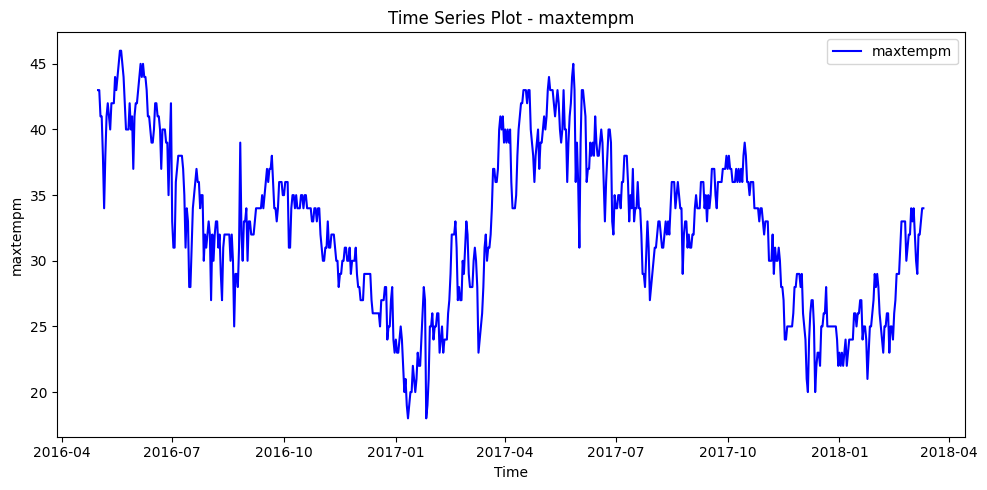

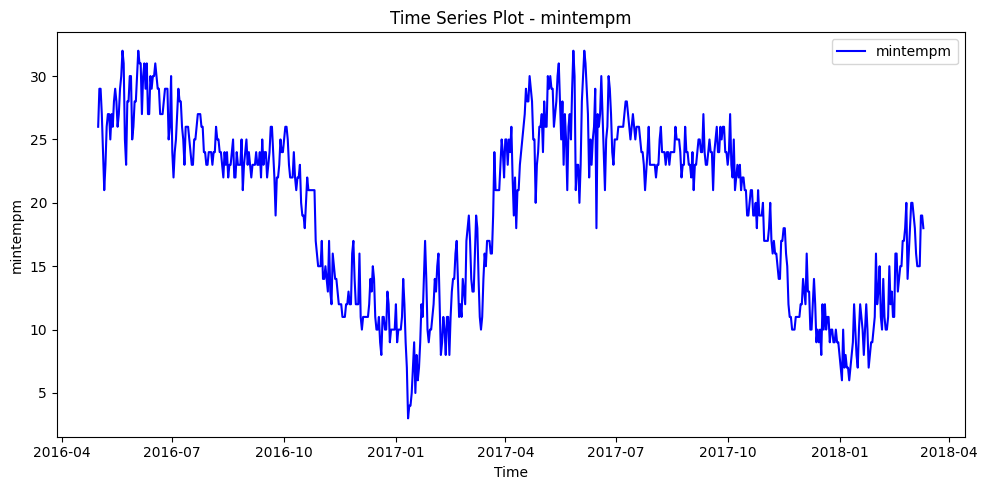

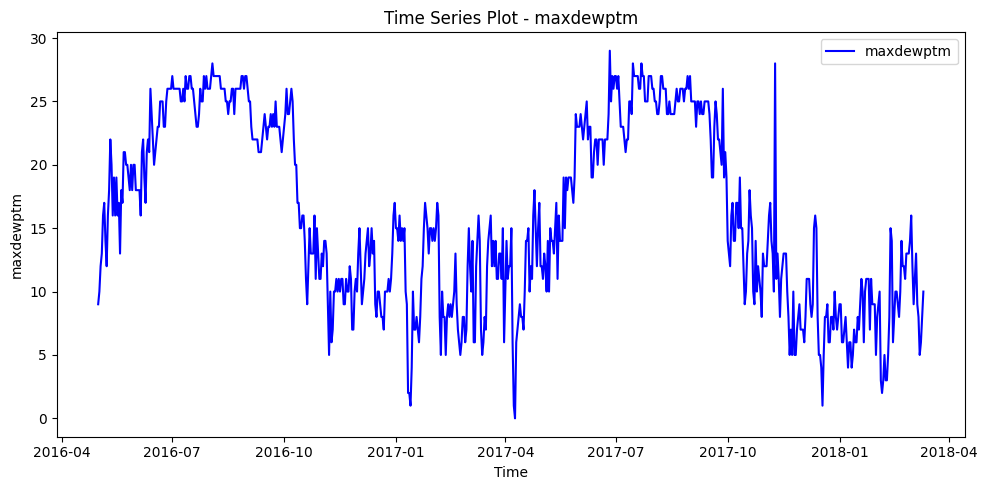

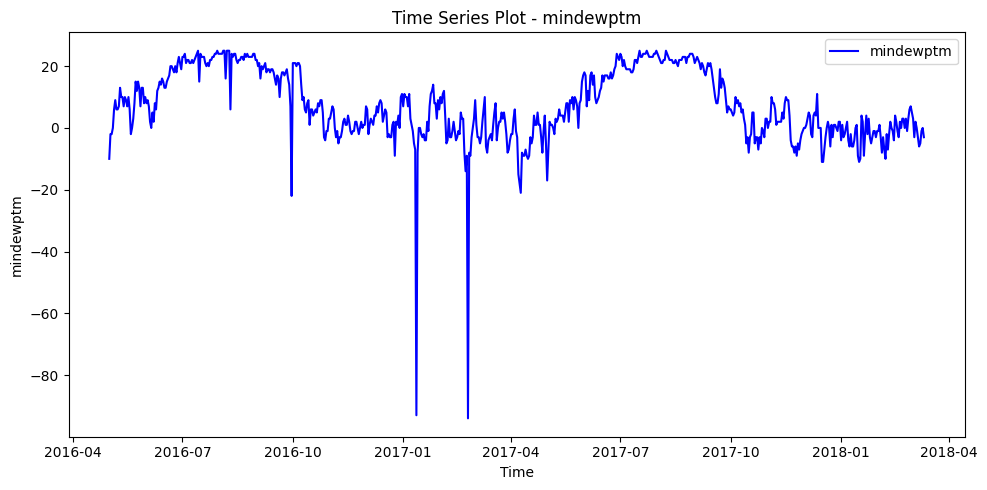

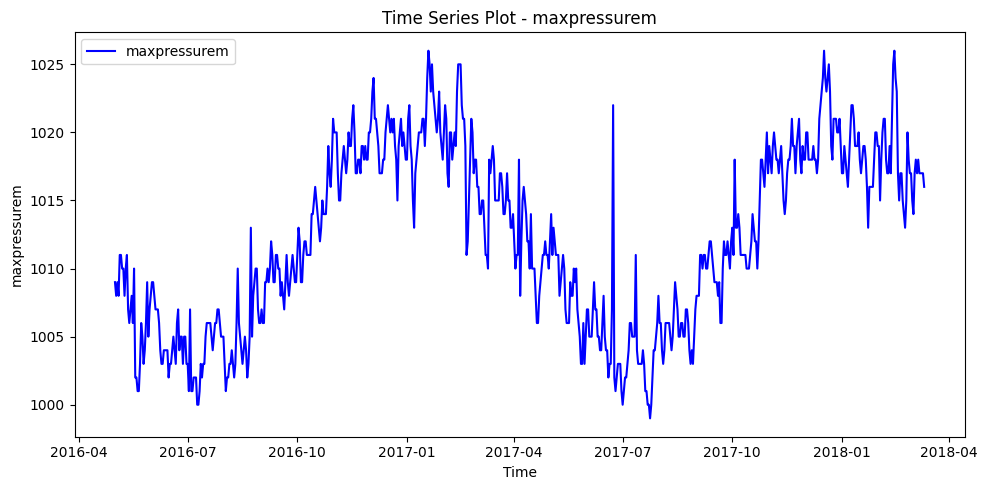

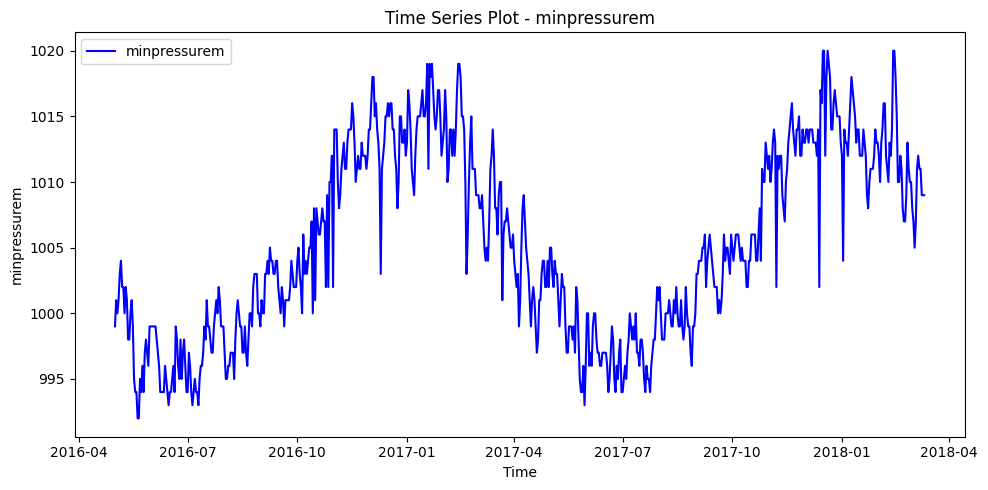

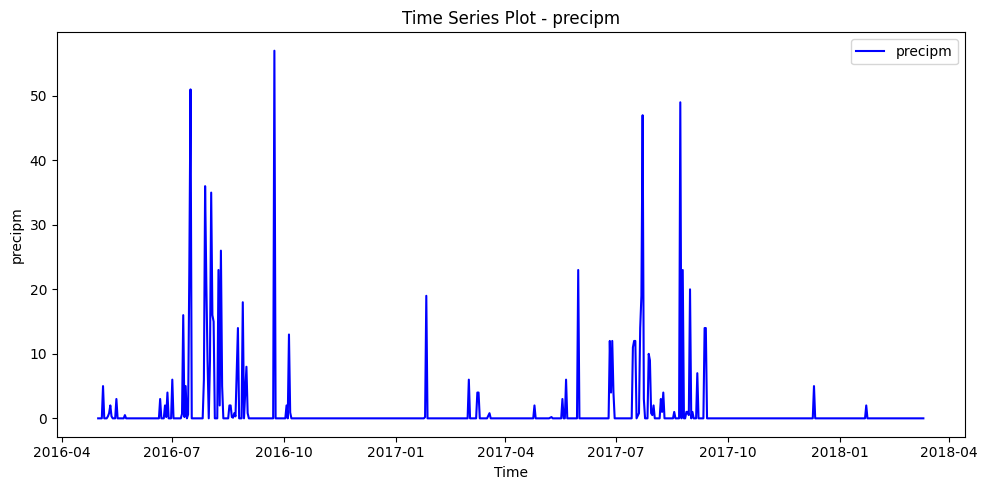

In [39]:
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    plt.figure(figsize=(10,5))
    plt.plot(df.index, df[col], label=col, color="blue")
    plt.title(f"Time Series Plot - {col}")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


<Figure size 1200x800 with 0 Axes>

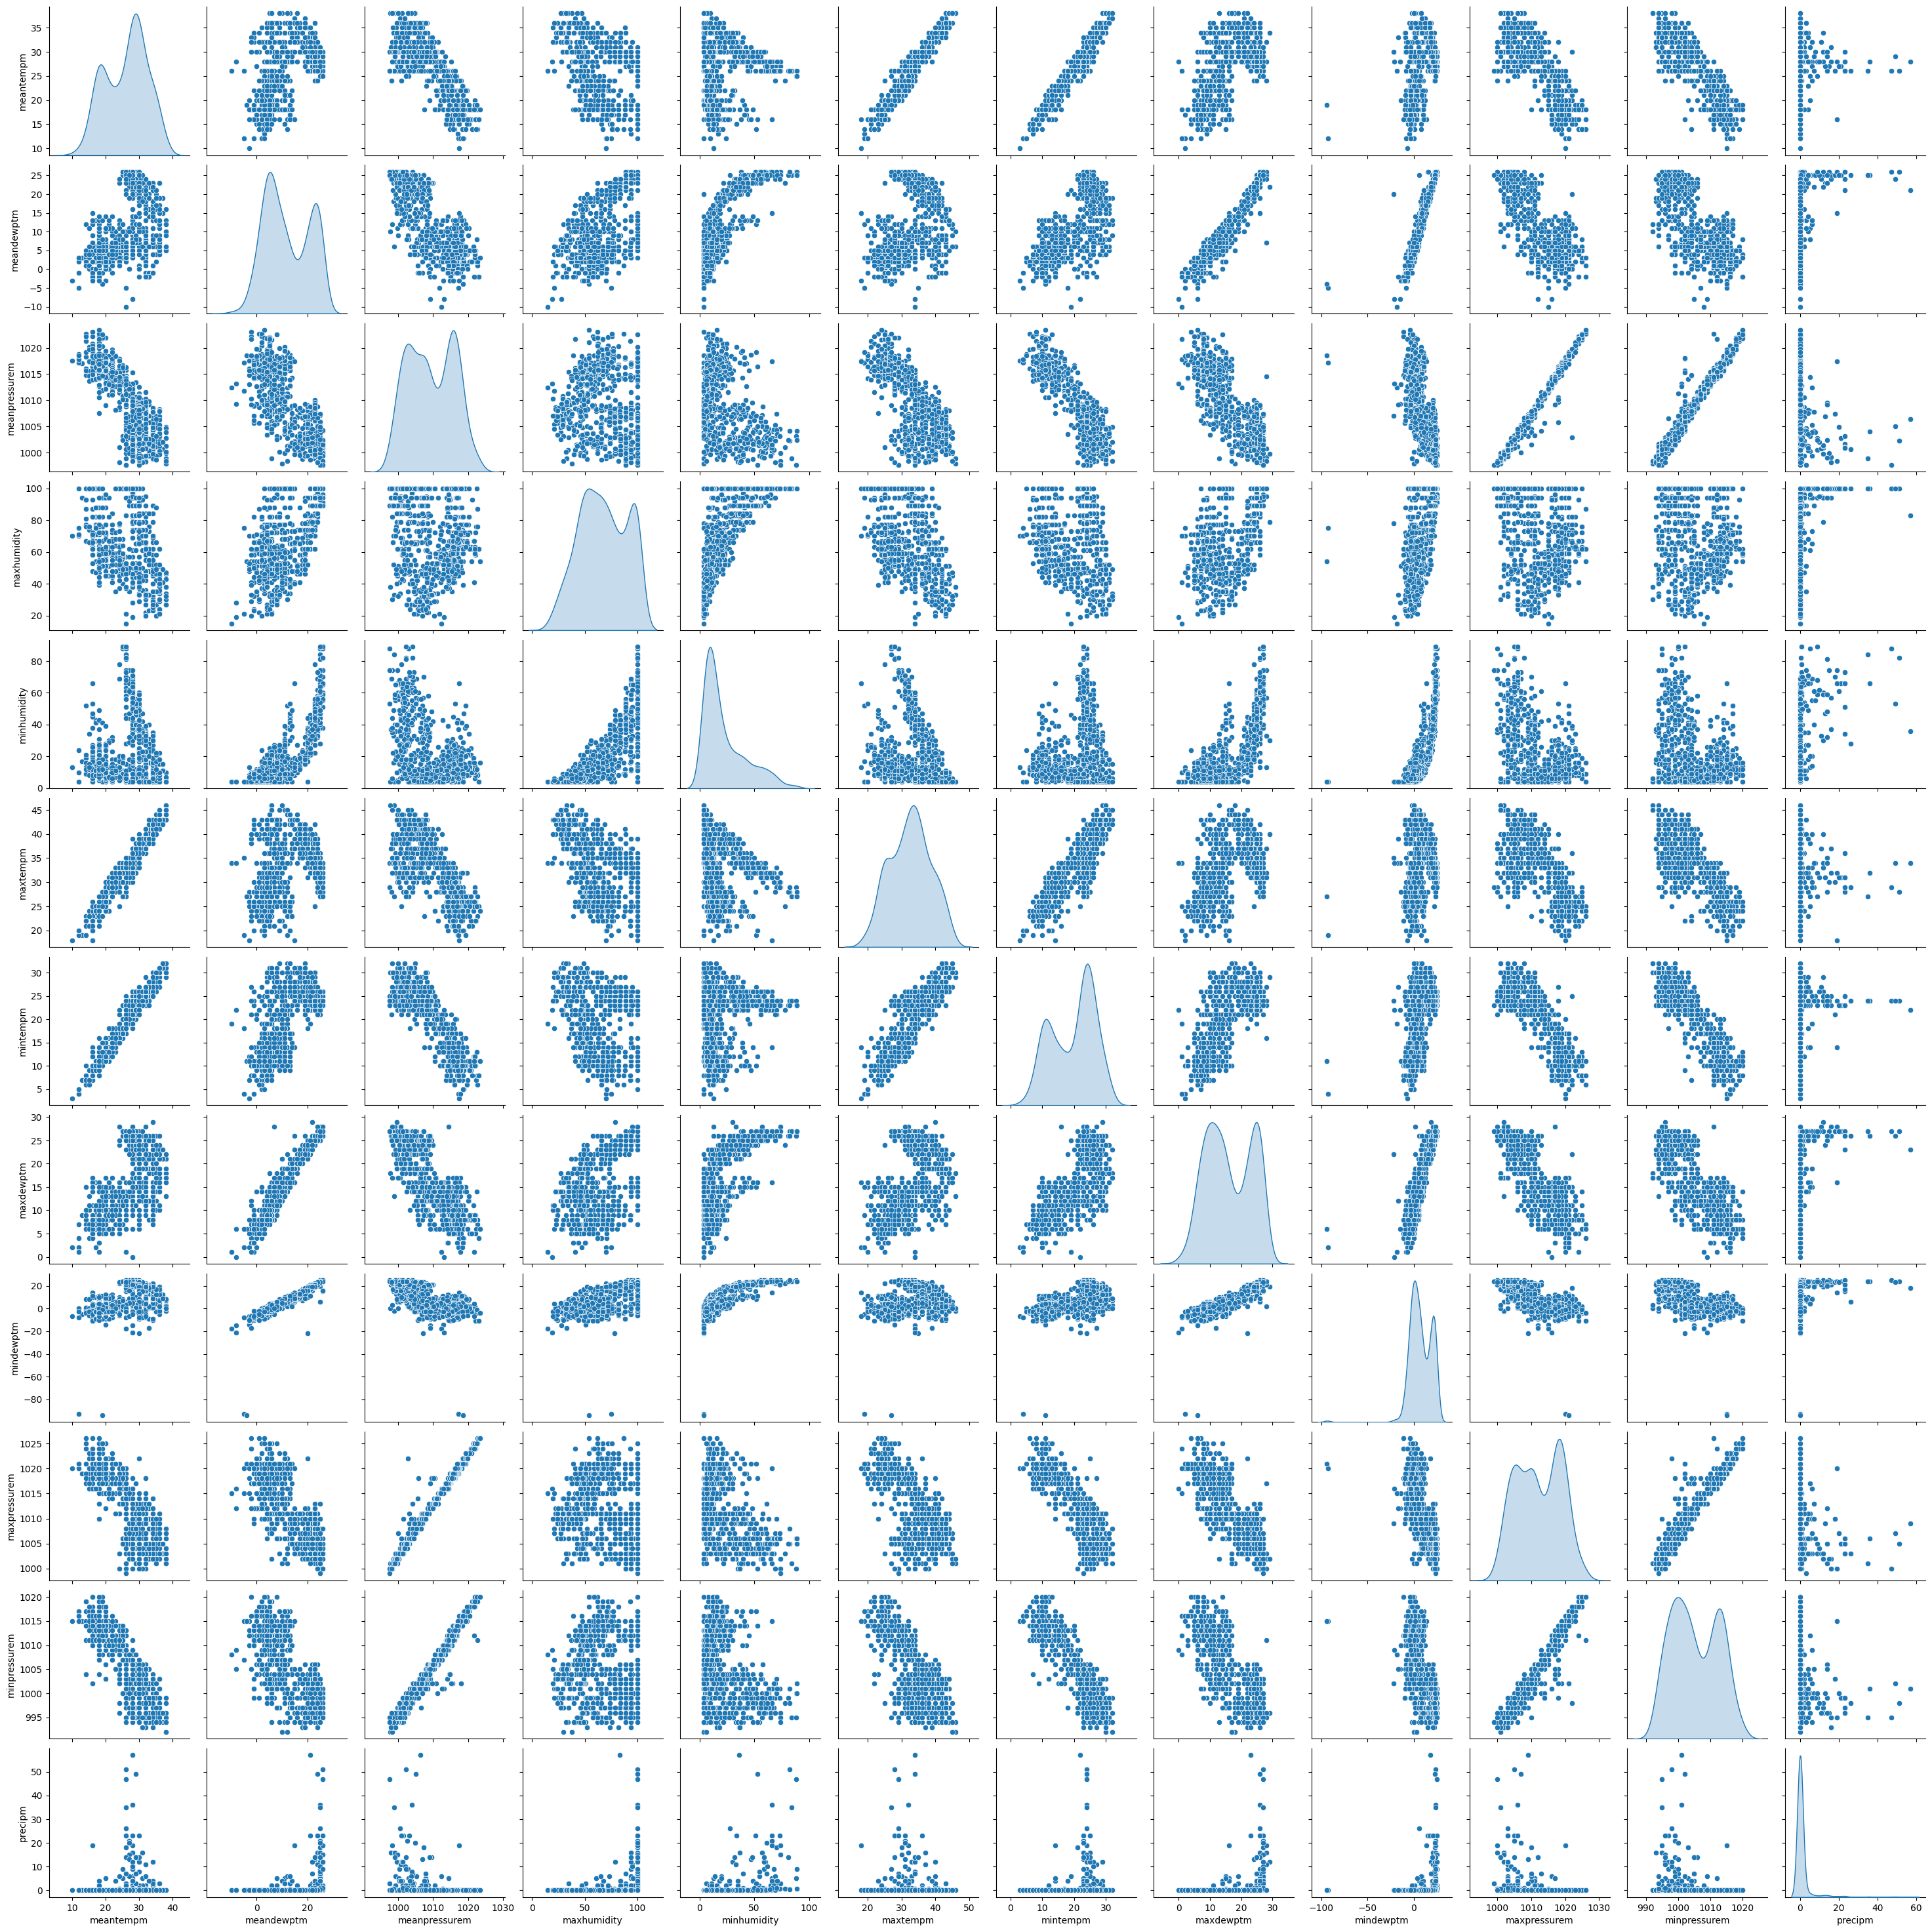

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns

# Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df[num_cols], diag_kind="kde")
plt.show()


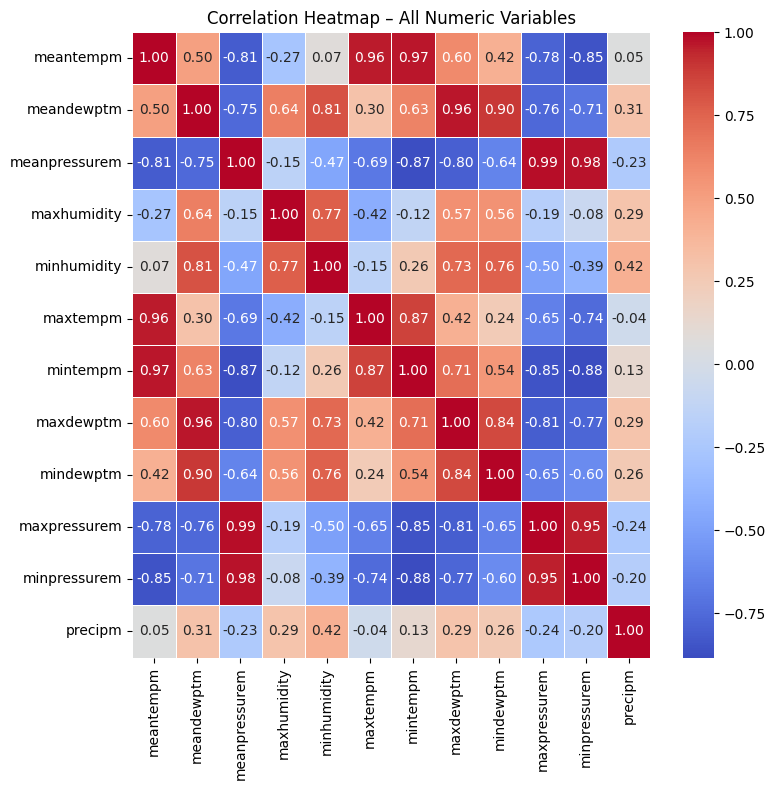

In [ ]:
num_cols = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = num_cols.corr()

plt.figure(figsize=(8,8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlation Heatmap – All Numeric Variables")
plt.tight_layout()
plt.show()


# Hypothesis testing

Temperature and pressure have a strong negative relationship, meaning hot days usually come with lower pressure.

Temperature and humidity also move in opposite directions, so when the temperature rises, the air tends to feel drier.

Minimum temperature and dew point show a strong positive link, which means nights stay warmer when there is more moisture in the air.

We also found that pressure and humidity are weakly related, with higher-pressure days being slightly drier.

Precipitation and humidity show a small positive relationship, which makes sense because higher humidity increases the chances of rain.


In [46]:
from scipy.stats import pearsonr

alpha = 0.05  # significance level

#Temperature vs Humidity
r, p = pearsonr(df['meantempm'], df['maxhumidity'])
print(f"Temperature vs Humidity: r={r:.3f}, p={p:.3e} -> "
      f"{'Significant' if p < alpha else 'Not Significant'}")
print("-"*50)

# Temperature vs Pressure
r, p = pearsonr(df['meantempm'], df['meanpressurem'])
print(f"Temperature vs Pressure: r={r:.3f}, p={p:.3e} -> "
      f"{'Significant' if p < alpha else 'Not Significant'}")
print("-"*50)

#Min Temperature vs Mean Dew Point
r, p = pearsonr(df['mintempm'], df['meandewptm'])
print(f"Min Temp vs Dew Point: r={r:.3f}, p={p:.3e} -> "
      f"{'Significant' if p < alpha else 'Not Significant'}")
print("-"*50)

# Pressure vs Humidity
r, p = pearsonr(df['meanpressurem'], df['maxhumidity'])
print(f"Pressure vs Humidity: r={r:.3f}, p={p:.3e} -> "
      f"{'Significant' if p < alpha else 'Not Significant'}")

print("-"*50)

# 5. Precipitation vs Humidity
r, p = pearsonr(df['precipm'], df['maxhumidity'])
print(f"Precipitation vs Humidity: r={r:.3f}, p={p:.3e} -> "
      f"{'Significant' if p < alpha else 'Not Significant'}")


Temperature vs Humidity: r=-0.268, p=1.327e-12 -> Significant
--------------------------------------------------
Temperature vs Pressure: r=-0.813, p=2.615e-161 -> Significant
--------------------------------------------------
Min Temp vs Dew Point: r=0.630, p=1.948e-76 -> Significant
--------------------------------------------------
Pressure vs Humidity: r=-0.155, p=5.165e-05 -> Significant
--------------------------------------------------
Precipitation vs Humidity: r=0.294, p=5.526e-15 -> Significant


# UMAP to visuvalize higher dimentional clusters in 2D


In [86]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, index=df.index, columns=df.columns)
X_scaled.head()

meantempm  meandewptm  meanpressurem  maxhumidity  minhumidity  \
date                                                                         
2016-05-01   1.271408   -1.483252      -0.597354    -1.953906    -0.968652   
2016-05-02   1.592990   -0.910630      -0.623639    -2.089390    -0.865286   
2016-05-03   1.432199   -0.681581      -0.540145    -1.818423    -0.916969   
2016-05-04   1.271408   -0.567056      -0.594262    -1.728100    -0.865286   
2016-05-05   0.789036   -0.108958      -0.240186    -0.282940    -0.503507   

            maxtempm  mintempm  maxdewptm  mindewptm  maxpressurem  \
date                                                                 
2016-05-01  1.737102  0.927354  -0.988503  -1.492295     -0.497240   
2016-05-02  1.737102  1.366660  -0.850198  -0.807712     -0.650707   
2016-05-03  1.404100  1.366660  -0.573588  -0.807712     -0.497240   
2016-05-04  1.404100  1.073789  -0.435283  -0.636566     -0.650707   
2016-05-05  0.904598  0.634482  -0.020369  -0.123129     -0.190307   

            minpressurem   precipm  
date                                
2016-05-01     -0.880449 -0.229706  
2016-05-02     -0.599516 -0.229706  
2016-05-03     -0.739982 -0.229706  
2016-05-04     -0.599516 -0.229706  
2016-05-05     -0.318583  0.692759

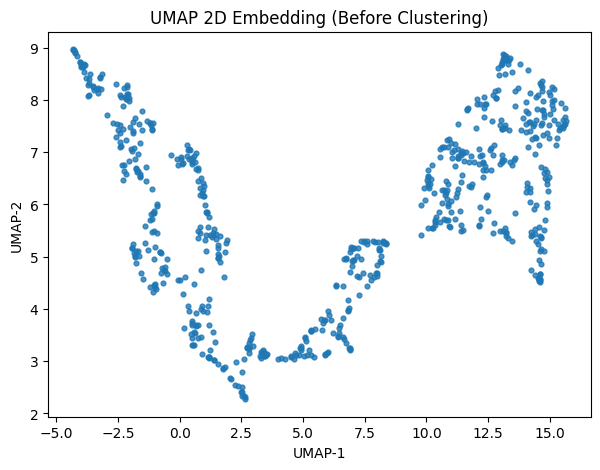

In [87]:
import umap.umap_ as umap


umap_vis = umap.UMAP(
    n_components=2,
    n_neighbors=12,     #15 will maintain local + global sturcture
    min_dist=0.1,
    random_state=42
)

X_umap_2d = umap_vis.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], s=12, alpha=0.8)
plt.title("UMAP 2D Embedding (Before Clustering)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()




# Clustering
*   Kmeans and GMM are performing identically with 0.46 silhouette score , DBscan isnt working well.
*   Selecting only the meaningful features. features = [
    'meantempm',
    'meandewptm',
    'meanpressurem',
    'maxhumidity',
    'precipm'
]

## Testing Models for Clustering with selected features and scaling







In [117]:
features = ['meantempm','meandewptm','meanpressurem','maxhumidity','precipm']

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Kmeans

Silhouette score is crossing 0.4 benchmark, we are able to categorise them too.

| Cluster | Weather Type                         | Key Pattern           |
|--------|----------------------------------------|------------------------|
| 0      | Cool & Dry, High Pressure              | Winter-like calm days  |
| 1      | Hot & Dry                              | Summer heat days       |
| 2      | Very Humid, Heavy Rain, Low Pressure   | Storm / peak monsoon   |
| 3      | Warm, Humid, Light Rain                | Normal monsoon days    |


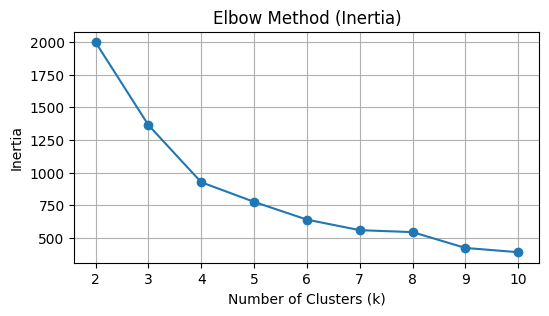

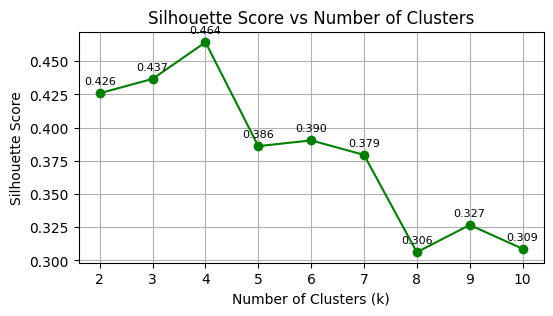

In [92]:
inertias = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,3))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(K_range, sil_scores, marker='o', color='green')

for i, k in enumerate(K_range):
    plt.text(k, sil_scores[i] + 0.005, f"{sil_scores[i]:.3f}",      #learnt a new function today, text makes you print things on the points
             ha='center', va='bottom', fontsize=8)

plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


Silhouette Score (k=4): 0.4643


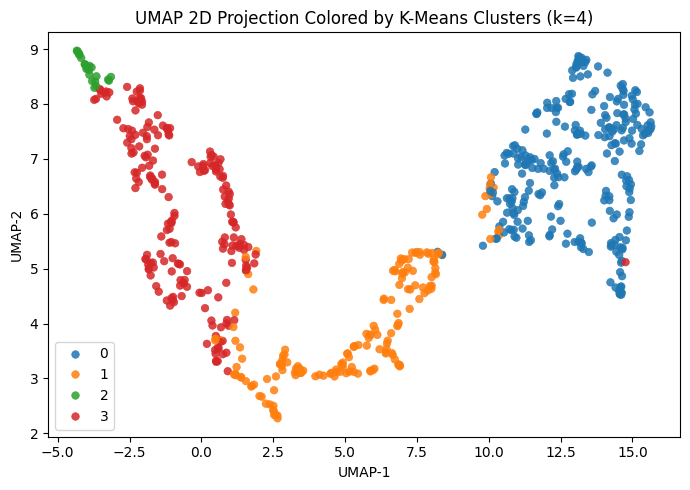

In [118]:
# Fit K-Means with k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Copy df for safety
df_kmeans = df.copy()
df_kmeans['kmeans_cluster'] = cluster_labels

# Silhouette Score
sil = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score (k=4): {sil:.4f}")

# ---- UMAP Visualization (Seaborn, with automatic legend) ----
plt.figure(figsize=(7,5))

sns.scatterplot(
    x=X_umap_2d[:, 0],
    y=X_umap_2d[:, 1],
    hue=df_kmeans['kmeans_cluster'],   # <-- seaborn auto legend
    palette='tab10',
    s=30,
    alpha=0.85,
    edgecolor=None
)

plt.title("UMAP 2D Projection Colored by K-Means Clusters (k=4)", fontsize=12)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")

plt.legend(
    title="Cluster",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.legend()
plt.tight_layout()
plt.show()


In [90]:
df_kmeans.groupby('kmeans_cluster')[['meantempm','meandewptm','meanpressurem','maxhumidity','precipm']].mean()

# 0 = Cool and dry, high pressure
# 1 = Hot and dry
# 2 = Very humid, heavy rain, low pressure
# 3 = Warm, humid, light rain


meantempm  meandewptm  meanpressurem  maxhumidity    precipm
kmeans_cluster                                                              
0               19.682482    5.076642    1016.194854    66.846715   0.067153
1               32.034682    8.774566    1006.765723    41.653179   0.119653
2               27.083333   24.125000    1003.214583    98.541667  25.250000
3               29.480769   22.245192    1003.658750    85.509615   0.962981

## DBSCAN

Silhouette score isnt crossing 0.4 benchmark, so not appropriate

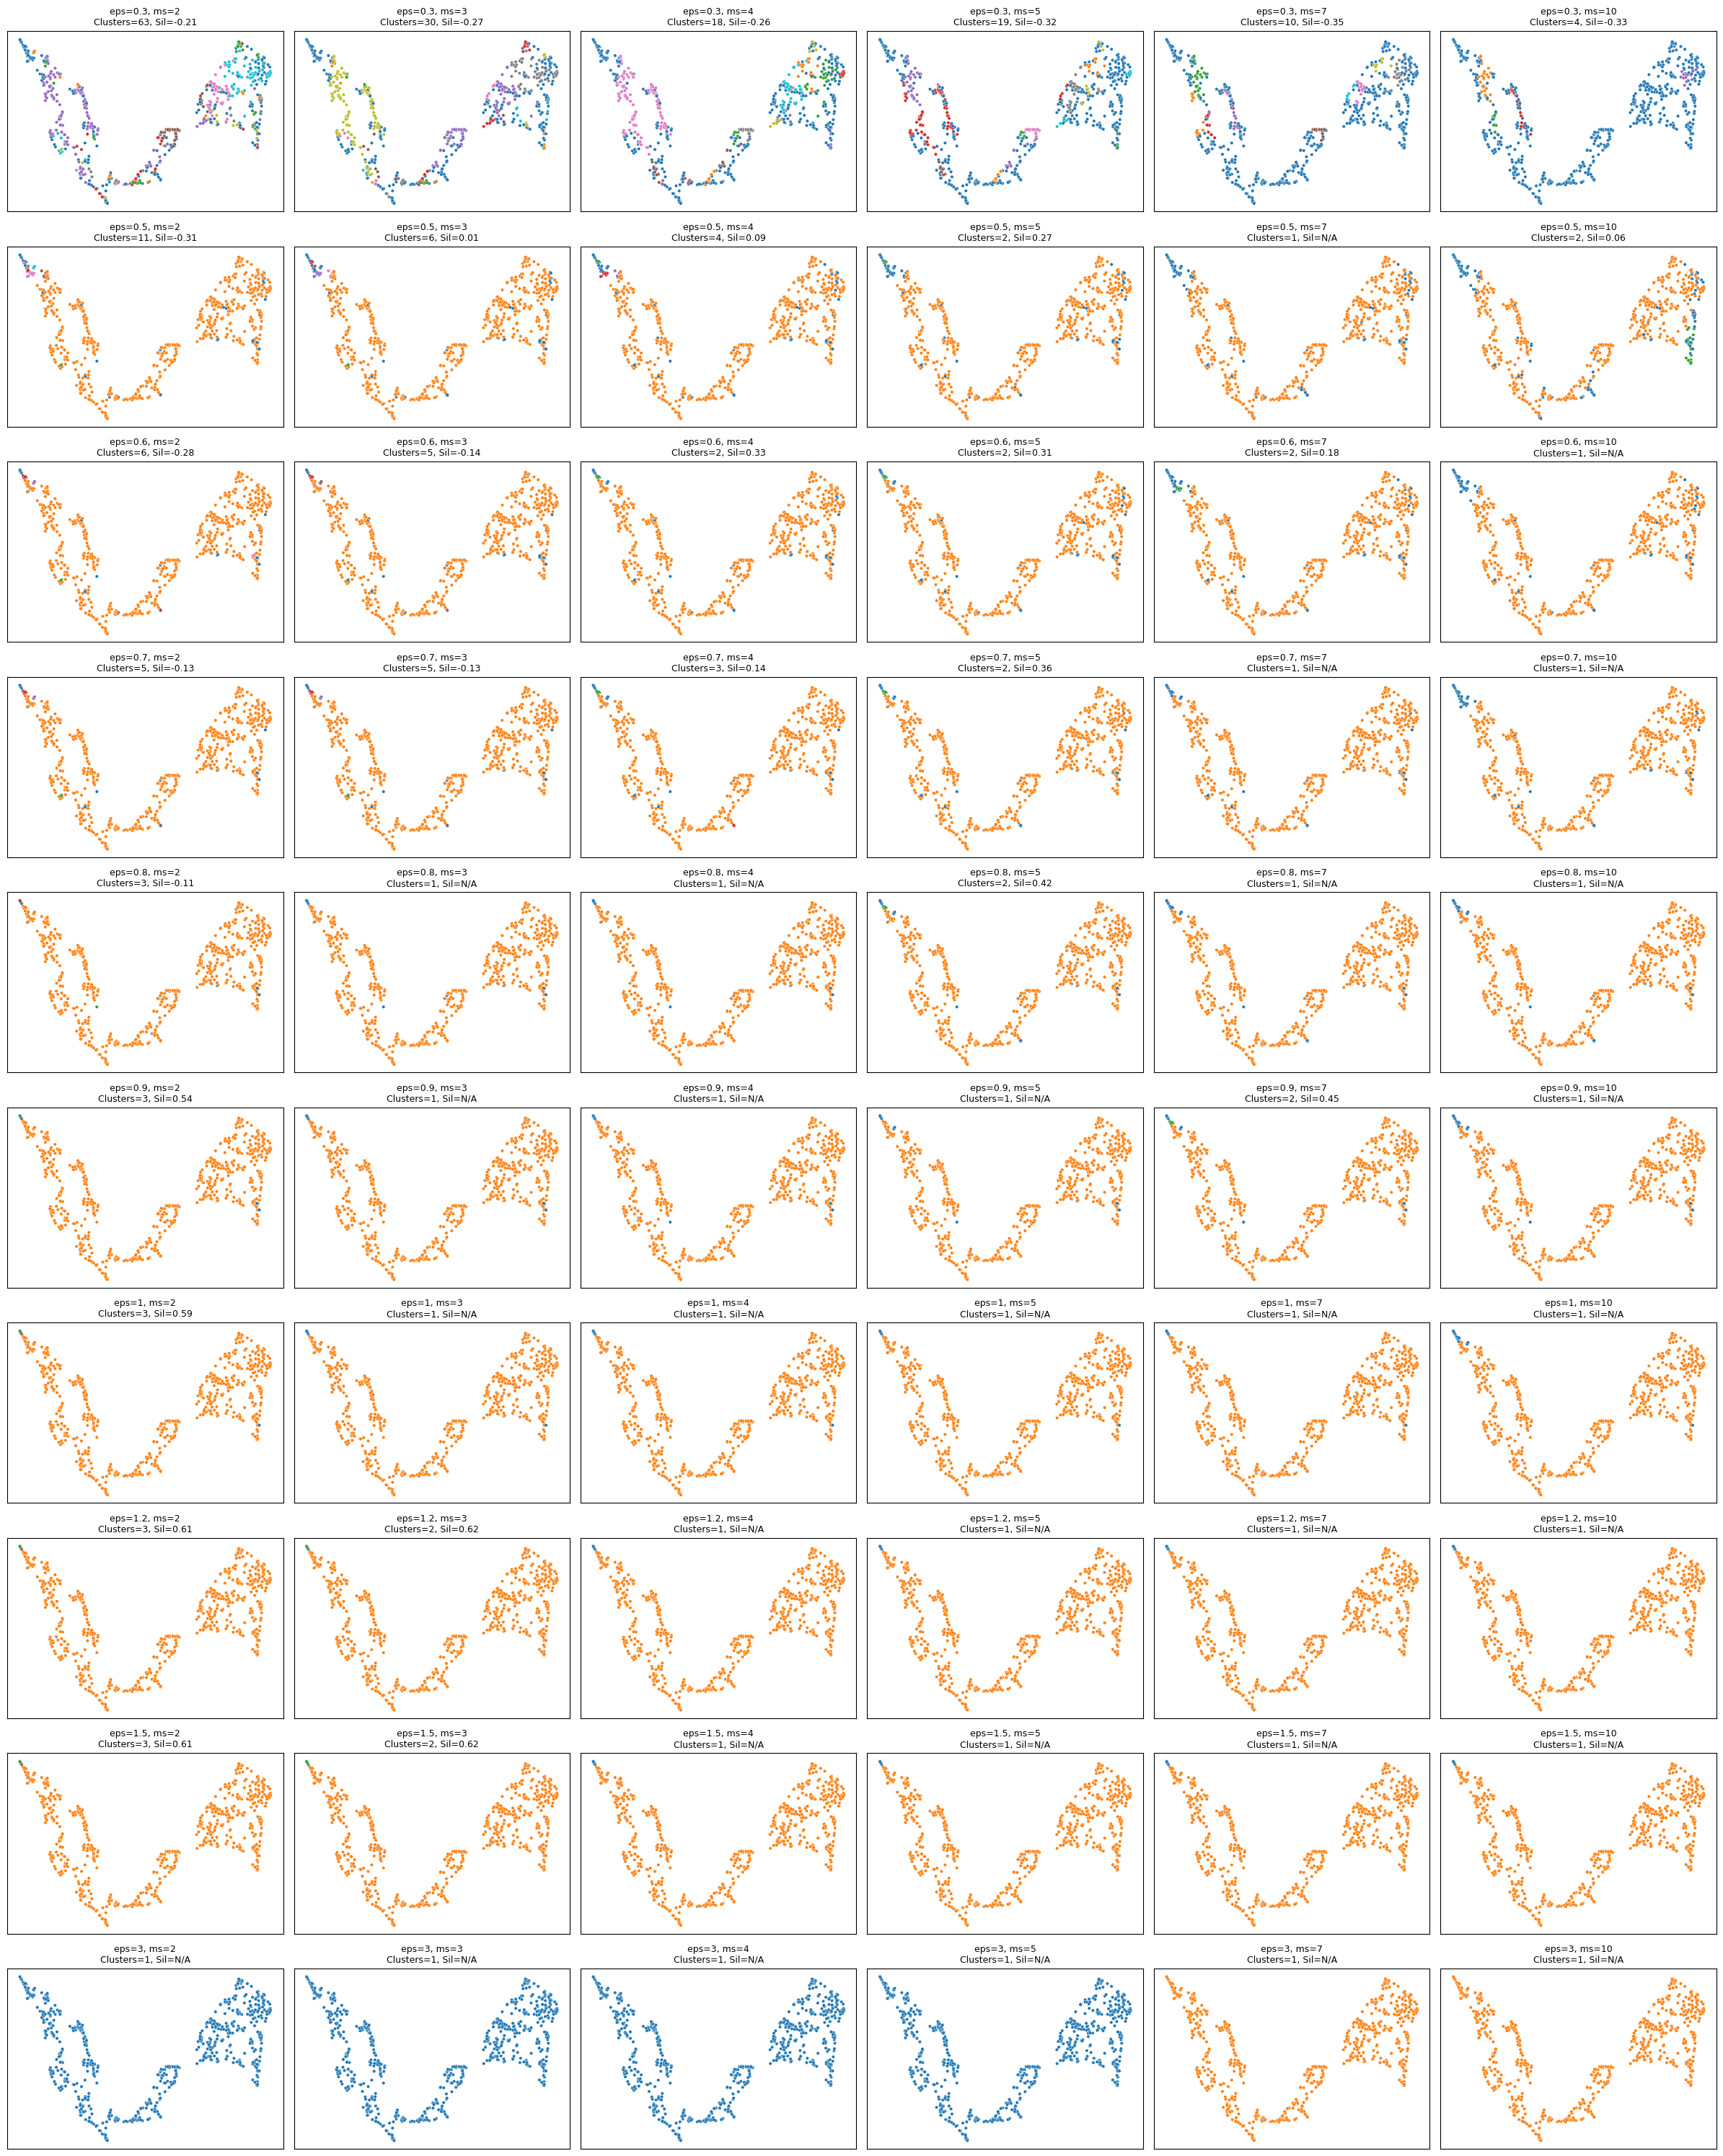

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

eps_values = [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.5, 3]
min_samples_values = [2, 3, 4, 5, 7, 10]

rows = len(eps_values)
cols = len(min_samples_values)

plt.figure(figsize=(4 * cols, 3 * rows))
plot_index = 1

for eps in eps_values:
    for ms in min_samples_values:

        dbscan = DBSCAN(eps=eps, min_samples=ms)
        labels = dbscan.fit_predict(X_scaled)

        # Count clusters (exclude noise = -1) as dbscan labels it as -1
        unique_clusters = np.unique(labels)
        n_clusters = len(unique_clusters[unique_clusters != -1])

        # Silhouette score only when valid
        if n_clusters >= 2:
            sil = silhouette_score(X_scaled, labels)
            sil_text = f"Sil={sil:.2f}"
        else:
            sil_text = "Sil=N/A"

        plt.subplot(rows, cols, plot_index)
        plot_index += 1

        sns.scatterplot(
            x=X_umap_2d[:, 0],
            y=X_umap_2d[:, 1],
            hue=labels,
            palette="tab10",
            s=10,
            legend=False
        )

        plt.title(
            f"eps={eps}, ms={ms}\nClusters={n_clusters}, {sil_text}",
            fontsize=9
        )

        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()


## GMM
Silhouette score is crossing 0.4 benchmark, we are able to categorise them too.

GMM Cluster | Weather Type      | Key Pattern
------------|--------------------|---------------------------
0           | Cool & Dry         | Winter-like clear days
1           | Hot & Dry          | Summer heat days
2           | Very Wet / Stormy  | Peak monsoon, heavy rain
3           | Humid Monsoon      | Normal monsoon weather


In [119]:
k_values = range(2, 8)
cov_types = ["full", "tied", "diag", "spherical"]

results = []

for k in k_values:
    for cov in cov_types:

        gmm = GaussianMixture(
            n_components=k,
            covariance_type=cov,
            random_state=42
        )

        # Fit & predict clusters
        labels = gmm.fit_predict(X_scaled)

        # number of clusters (all labels except noise)
        n_clusters = len(np.unique(labels))

        # silhouette score valid only if >= 2 clusters
        if n_clusters >= 2:
            sil = silhouette_score(X_scaled, labels)
        else:
            sil = np.nan

        results.append([k, cov, sil])


In [120]:
df_gmm = pd.DataFrame(
    results,
    columns=["n_components", "covariance_type", "silhouette"]
)

df_sorted = df_gmm.sort_values("silhouette", ascending=False)
print(df_sorted[:10])

best_row = df_sorted.iloc[0]

best_k = int(best_row["n_components"])
best_cov = best_row["covariance_type"]
best_sil = best_row["silhouette"]

print("\nBest GMM Model:")
print(f"Clusters = {best_k}")
print(f"Covariance = {best_cov}")
print(f"Silhouette = {best_sil:.4f}")


    n_components covariance_type  silhouette
11             4       spherical    0.459567
9              4            tied    0.438827
7              3       spherical    0.433529
1              2            tied    0.424306
5              3            tied    0.409009
3              2       spherical    0.399104
23             7       spherical    0.378461
19             6       spherical    0.377301
15             5       spherical    0.372224
17             6            tied    0.371716

Best GMM Model:
Clusters = 4
Covariance = spherical
Silhouette = 0.4596


In [121]:
best_gmm = GaussianMixture(
    n_components=best_k,
    covariance_type=best_cov,
    random_state=42
)

best_labels = best_gmm.fit_predict(X_scaled)


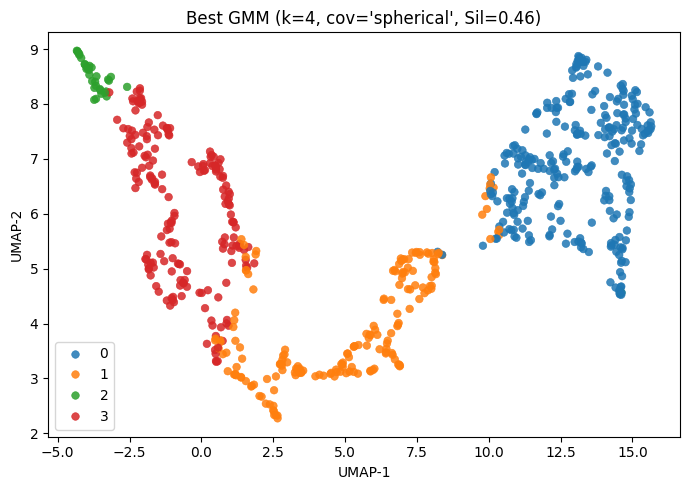

In [122]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    x=X_umap_2d[:, 0],
    y=X_umap_2d[:, 1],
    hue=best_labels,
    palette='tab10',
    s=30,
    alpha=0.85,
    edgecolor=None
)

plt.title(f"Best GMM (k={best_k}, cov='{best_cov}', Sil={best_sil:.2f})")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")

plt.legend(
    title="Clusters",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.legend()
plt.tight_layout()
plt.show()



In [123]:
# Make a copy to avoid modifying the original df
df_gmm_res = df.copy()
df_gmm_res["gmm_cluster"] = best_labels

features = ['meantempm', 'meandewptm', 'meanpressurem', 'maxhumidity', 'precipm']

# Group by GMM cluster
gmm_summary = df_gmm_res.groupby("gmm_cluster")[features].mean()
gmm_summary
# 0 = Cool and dry, high pressure
# 1 = Hot and dry
# 2 = Very humid, heavy rain, low pressure
# 3 = Warm, humid, light rain

meantempm  meandewptm  meanpressurem  maxhumidity    precipm
gmm_cluster                                                              
0            19.699275    5.101449    1016.158261    66.858696   0.081159
1            32.049180    9.300546    1006.573224    42.972678   0.124044
2            27.666667   24.333333    1002.701818    97.454545  21.272727
3            29.422460   22.470588    1003.712781    86.310160   0.525668

# -----------------------------------------------------------------------------------

# Time Series Analysis

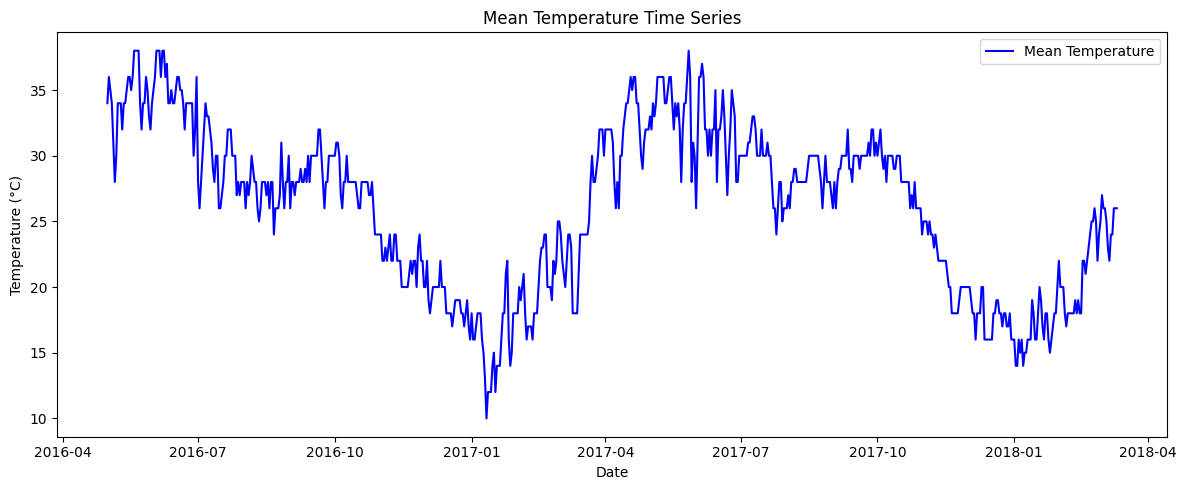

In [126]:
plt.figure(figsize=(12,5))
plt.plot(df['meantempm'], label='Mean Temperature', color='blue')

plt.title("Mean Temperature Time Series")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

#very heavy seasonality, and it repeats every year so D = 1

## Finding Trend, season and noise in the series

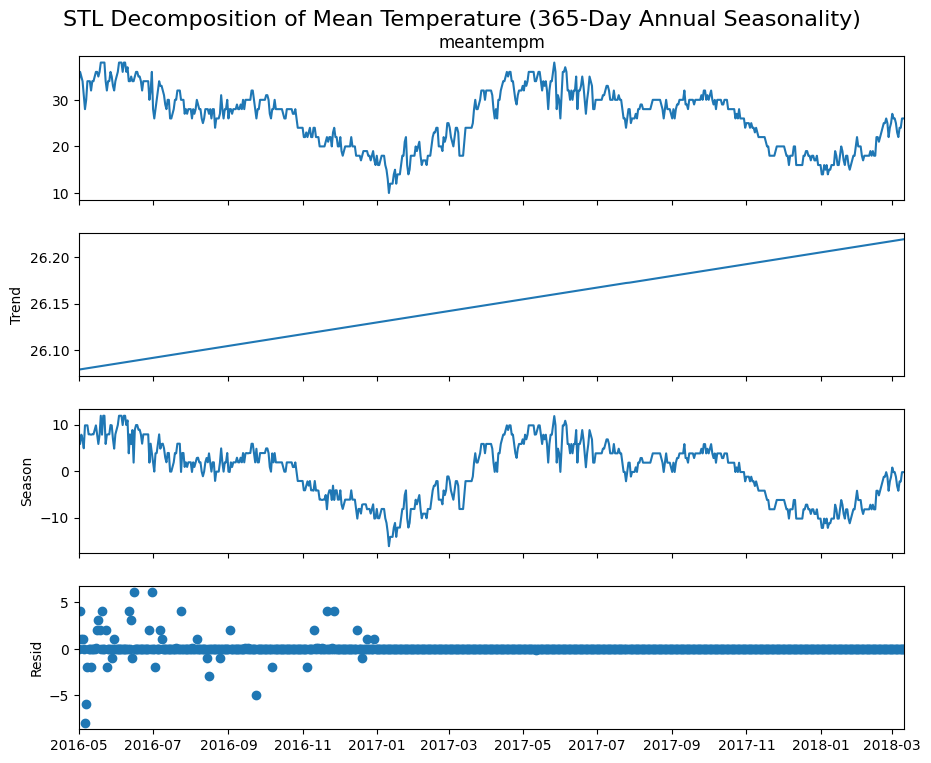

In [129]:
from statsmodels.tsa.seasonal import STL #turns out that seasonal_decompose is causing issues with the period due to data being for less than 2 years

# Use only mean temperature
series = df['meantempm']

# STL with annual seasonality (still allowed even if dataset <2 yrs)
stl = STL(series, period=365, robust=True)
result = stl.fit()

fig = result.plot()
fig.set_size_inches(10, 8)
plt.suptitle("STL Decomposition of Mean Temperature (365-Day Annual Seasonality)", fontsize=16)
plt.show()


# Mean temperature has a strong annual seasonal pattern.
# The trend is almost flat, as expected for <2 years of data.
# Residuals show the expected noise after removing partial seasonality and weak trend.

## Creating Lag terms and Train Test split

In [74]:
# Create Lag Features BEFORE Train/Test
df["lag1"] = df["meantempm"].shift(1)
df["lag2"] = df["meantempm"].shift(2)
df["lag7"] = df["meantempm"].shift(7)

df = df.dropna()

# Train/test split again after lags are added
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test  = df.iloc[train_size:]


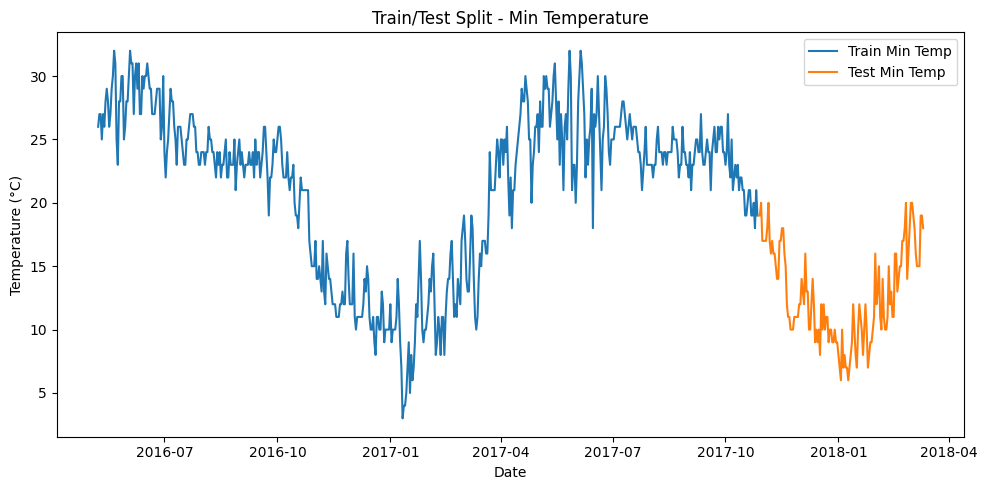

In [75]:
plt.figure(figsize=(10,5))
plt.plot(train['mintempm'], label='Train Min Temp')
plt.plot(test['mintempm'], label='Test Min Temp')
plt.title("Train/Test Split - Min Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()


## AD Fuller test to check for stationarity of the series
gives (d = 1)

In [76]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=""):
    print(f"ADF Test for {title}")
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations']
    for value, label in zip(result[:4], labels):
        print(f"{label} : {value}")
    print("Critical Values:")
    for key, val in result[4].items():
        print(f"   {key}: {val}")
    if result[1] <= 0.05:
        print("Series is STATIONARY")
    else:
        print("Series is NON-STATIONARY")

# Run test on mean temperature only
adf_test(df['meantempm'], 'Mean Temperature')


ADF Test for Mean Temperature
ADF Statistic : -2.049679303779328
p-value : 0.26522387819899496
# Lags Used : 5
# Observations : 666
Critical Values:
   1%: -3.440206881811471
   5%: -2.8658894709126246
   10%: -2.569086242819396
Series is NON-STATIONARY


In [77]:
df['meantempm_diff'] = df['meantempm'].diff()
adf_test(df['meantempm_diff'].dropna(), "Mean Temperature (1st Difference)")


ADF Test for Mean Temperature (1st Difference)
ADF Statistic : -16.793078843599023
p-value : 1.237480372460701e-29
# Lags Used : 4
# Observations : 666
Critical Values:
   1%: -3.440206881811471
   5%: -2.8658894709126246
   10%: -2.569086242819396
Series is STATIONARY


## ACF PACF

<Figure size 1200x400 with 0 Axes>

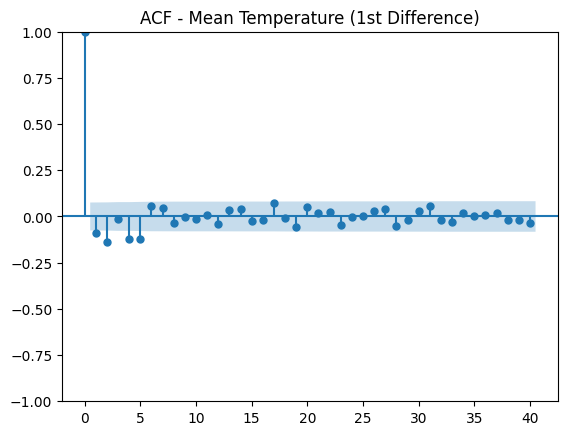

<Figure size 1200x400 with 0 Axes>

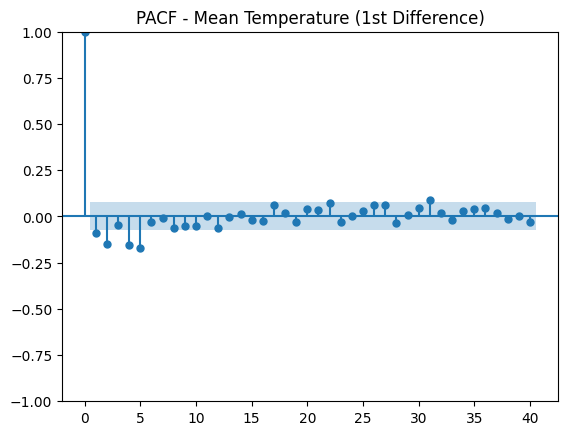

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,4))
plot_acf(df['meantempm_diff'].dropna(), lags=40)
plt.title("ACF - Mean Temperature (1st Difference)")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(df['meantempm_diff'].dropna(), lags=40, method='ywm')
plt.title("PACF - Mean Temperature (1st Difference)")
plt.show()


## ARIMA

MAE: 7.3630
Accuracy: 0.6280


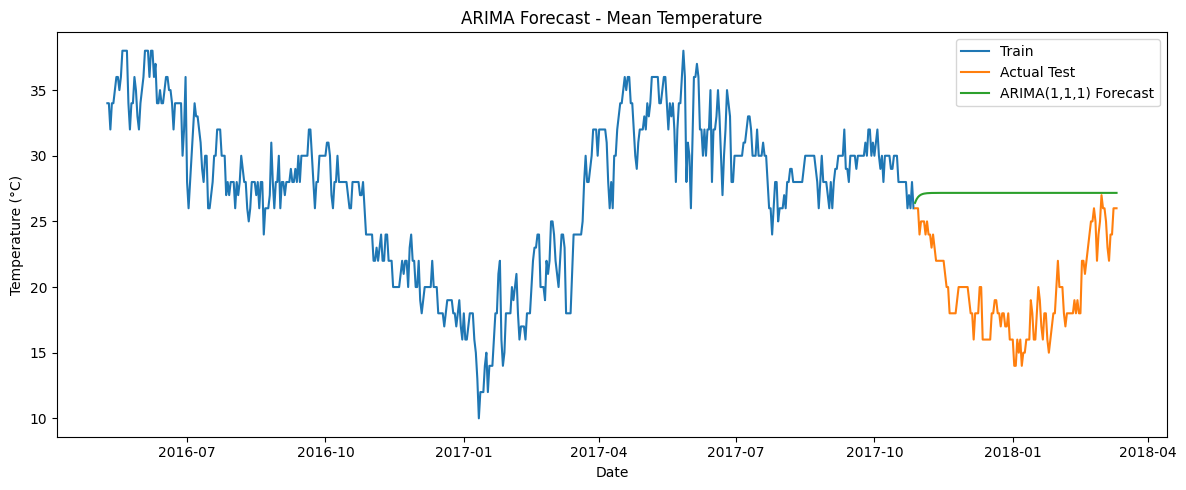

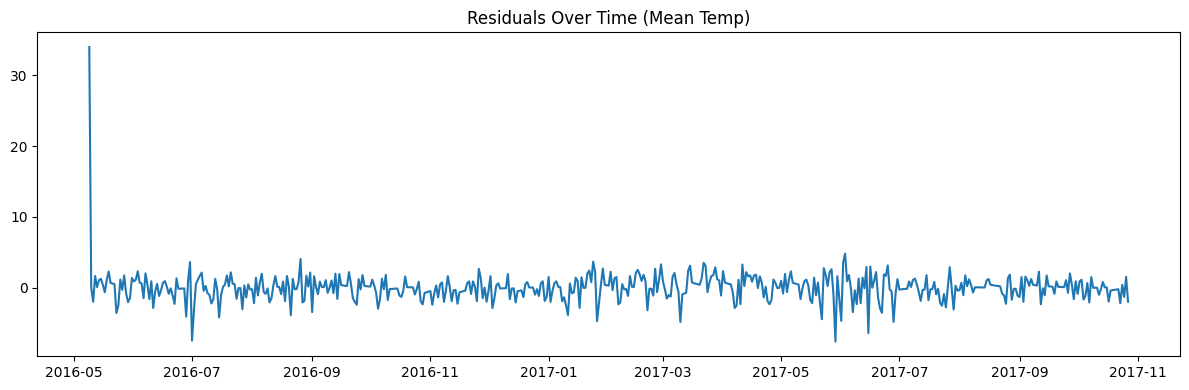

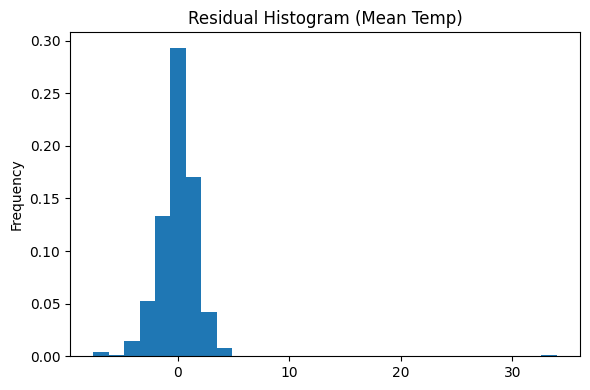

In [82]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

def run_arima_mean_temp():

    y_train = train['meantempm']
    y_test  = test['meantempm']

    # Build ARIMA(1,1,1)
    model = ARIMA(y_train, order=(1,1,1))
    model_fit = model.fit()

    # Forecast equal to test size
    forecast = model_fit.forecast(steps=len(y_test))

    # Evaluation
    mae = mean_absolute_error(y_test, forecast)
    acc = 1 - mae / y_test.mean()

    print(f"MAE: {mae:.4f}")
    print(f"Accuracy: {acc:.4f}")

    # Forecast Plot
    plt.figure(figsize=(12,5))
    plt.plot(y_train.index, y_train, label="Train")
    plt.plot(y_test.index, y_test, label="Actual Test")
    plt.plot(y_test.index, forecast, label="ARIMA(1,1,1) Forecast")
    plt.title("ARIMA Forecast - Mean Temperature")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Residual Analysis
    residuals = model_fit.resid

    # 1. Residuals over time
    plt.figure(figsize=(12,4))
    plt.plot(residuals)
    plt.title("Residuals Over Time (Mean Temp)")
    plt.tight_layout()
    plt.show()

    # 2. Residual histogram
    plt.figure(figsize=(6,4))
    residuals.plot(kind='hist', bins=30, density=True)
    plt.title("Residual Histogram (Mean Temp)")
    plt.tight_layout()
    plt.show()

    return mae, acc, forecast, residuals


# Run ARIMA + Residuals
arima_mae_mean, arima_acc_mean, arima_forecast_mean, arima_residuals_mean = run_arima_mean_temp()


In [136]:
model = ARIMA(df['meantempm'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              meantempm   No. Observations:                  665
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.537
Date:                Sun, 23 Nov 2025   AIC                           2459.073
Time:                        20:31:39   BIC                           2472.568
Sample:                             0   HQIC                          2464.303
                                - 665                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6449      0.060     10.725      0.000       0.527       0.763
ma.L1         -0.8462      0.045    -18.679      0.000      -0.935      -0.757
sigma2         2.3541      0.092     25.551      0.0

## SARIMAX

MAE (SARIMAX): 2.5732
Accuracy (SARIMAX): 0.8700


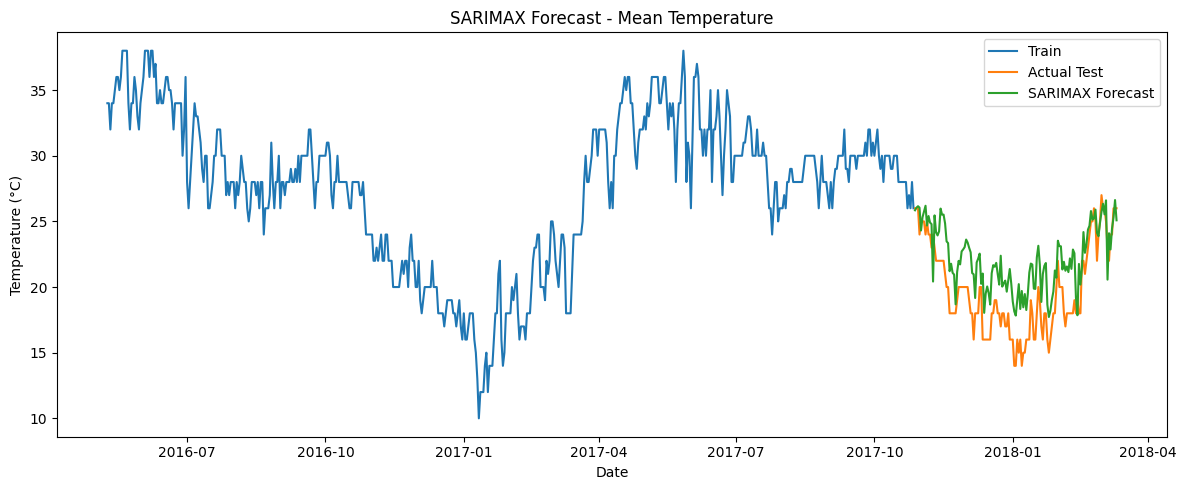

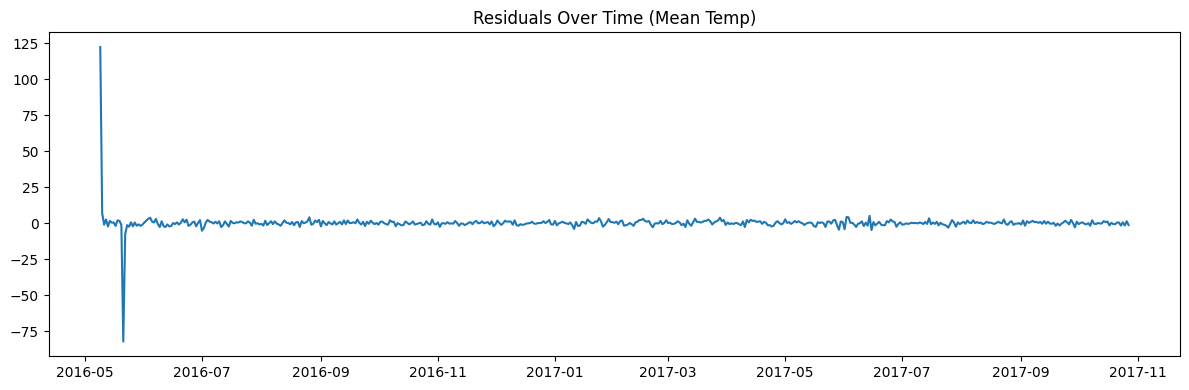

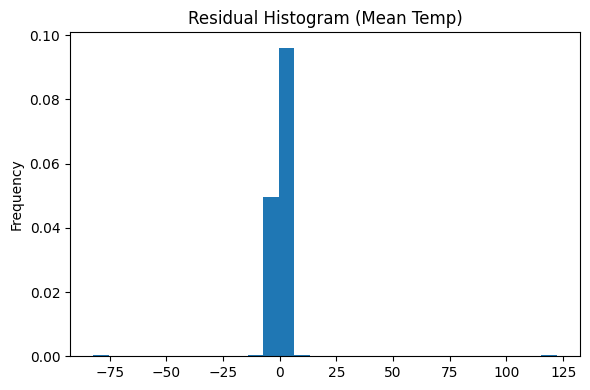

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Prepare exogenous variables
exog_vars = ['meandewptm', 'meanpressurem', 'maxhumidity', 'precipm','lag1', 'lag2', 'lag7']

y_train = train['meantempm']
y_test  = test['meantempm']

train_exog = train[exog_vars]
test_exog  = test[exog_vars]

# Build SARIMAX Model
sarimax_mean = SARIMAX(
    y_train,
    exog=train_exog,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),   # even though seasonality is annual we cant use it as for less than 2 years SARIMAX struggles
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

# Forecast
forecast_mean = sarimax_mean.forecast(steps=len(y_test), exog=test_exog)

#Evaluate
mae_mean = mean_absolute_error(y_test, forecast_mean)
acc_mean = 1 - mae_mean / y_test.mean()

print(f"MAE (SARIMAX): {mae_mean:.4f}")
print(f"Accuracy (SARIMAX): {acc_mean:.4f}")

# Plot Forecast
plt.figure(figsize=(12,5))
plt.plot(y_train.index, y_train, label="Train")
plt.plot(y_test.index, y_test, label="Actual Test")
plt.plot(y_test.index, forecast_mean, label="SARIMAX Forecast")
plt.title("SARIMAX Forecast - Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

# Residuals over time
res_mean = sarimax_mean.resid

plt.figure(figsize=(12,4))
plt.plot(res_mean)
plt.title("Residuals Over Time (Mean Temp)")
plt.tight_layout()
plt.show()

# Residual Histogram
plt.figure(figsize=(6,4))
res_mean.plot(kind='hist', bins=30, density=True)
plt.title("Residual Histogram (Mean Temp)")
plt.tight_layout()
plt.show()


In [84]:
sarimax_model = SARIMAX(
    df['meantempm'],
    exog=df[['meandewptm','meanpressurem','maxhumidity','precipm']],
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarimax_fit = sarimax_model.fit(disp=False)

print("\n===== SARIMAX Summary =====")
print(sarimax_fit.summary())


===== SARIMAX Summary =====
                                     SARIMAX Results                                      
Dep. Variable:                          meantempm   No. Observations:                  671
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1136.035
Date:                            Sun, 23 Nov 2025   AIC                           2290.071
Time:                                    21:55:57   BIC                           2330.280
Sample:                                         0   HQIC                          2305.674
                                            - 671                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
meandewptm        0.1798      0.026      6.959      0.000       0.129       0.2